In [94]:
import numpy as np
import matplotlib.pyplot as plt

## ¿Cómo un computador lee imágenes?

Text(0.5, 1.0, 'Tamaño(565, 780, 3)')

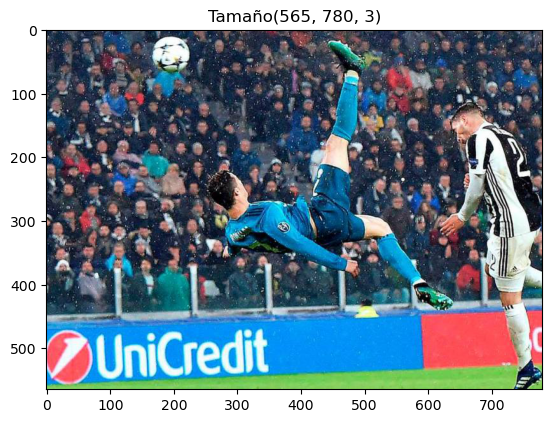

In [95]:
img = plt.imread("data/cr7.jpg")
plt.imshow(img)
plt.title("Tamaño" + str(img.shape))


Text(0.5, 1.0, 'Tamaño(565, 780)')

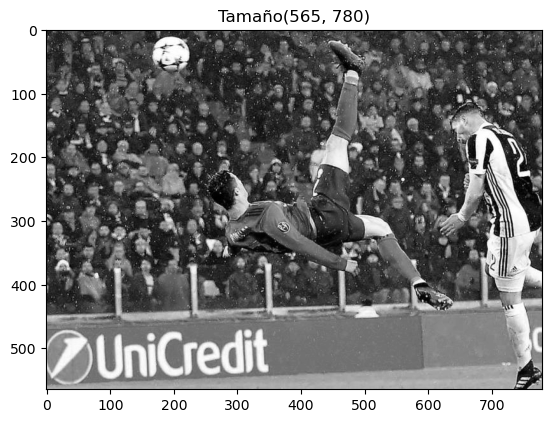

In [96]:
img_gray = np.dot(img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img_gray, cmap='gray')
plt.title("Tamaño" + str(img_gray.shape))

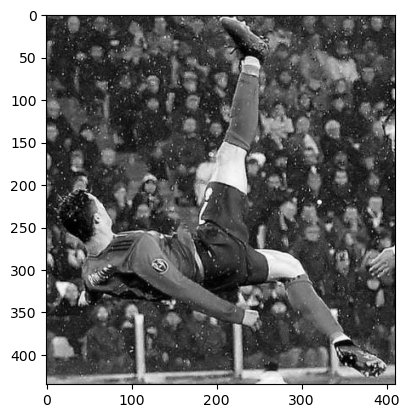

In [97]:
cr7 = img_gray[15:450,240:650]
plt.imshow(cr7, cmap='gray')

## ¿Qué es una convolución?

Una convolución es una operación matemática que se realiza sobre una imagen para extraer características específicas. En el caso de las redes neuronales convolucionales, las convoluciones se realizan de manera iterativa sobre la imagen de entrada, utilizando un conjunto de filtros (kernels) que se aprenden durante el entrenamiento de la red.

In [98]:
img = np.array([[3,0,1,2],[1,5,8,9],[2,7,2,5],[0,1,3,1]])
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print(img)
print(kernel)

[[3 0 1 2]
 [1 5 8 9]
 [2 7 2 5]
 [0 1 3 1]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


[![Convolución](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)](https://es.wikipedia.org/wiki/Convoluci%C3%B3n)

### Ejercicio

<img src=data/conv.jpg height=400>

En su cuaderno complete los números faltantes dentro de la imagen de salida de la convolución.

In [99]:
def convolucion(img, kernel):
    alto = img.shape[0] - kernel.shape[0] + 1
    ancho = img.shape[1] - kernel.shape[1] + 1
    new_img = np.zeros((alto, ancho))
    for i in range(alto):
        for j in range(ancho):
            new_img[i,j] = np.sum(img[i:i+kernel.shape[0], j:j+kernel.shape[1]]*kernel)
    return new_img

In [100]:
convolucion(img, kernel)

array([[ -5.,  -4.],
       [-10.,  -2.]])

### Para que sirven los kernels?

In [101]:
kernel = np.ones((3,3))

#### ¿Que creen que hace el kernel solo lleno de unos?

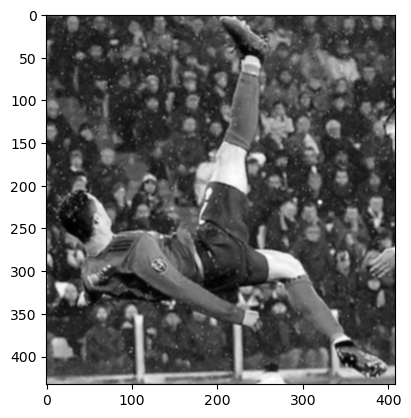

In [102]:
cr7_filtrado = convolucion(cr7, kernel)
plt.imshow(cr7_filtrado, cmap='gray')

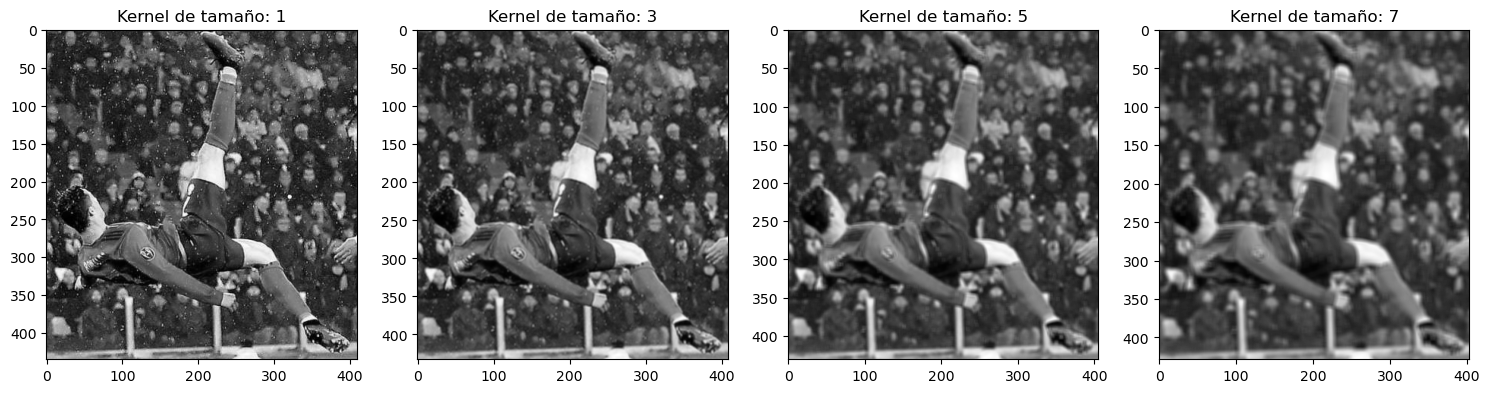

In [103]:
fig,ax = plt.subplots(1,4,tight_layout=True,figsize=(15,5))
for i,ax_ in enumerate(ax):
    size = 2*i+1
    kernel = np.ones((size,size))
    cr7_filtrado = convolucion(cr7, kernel)
    ax_.imshow(cr7_filtrado, cmap='gray')
    ax_.set_title("Kernel de tamaño: " + str(size))

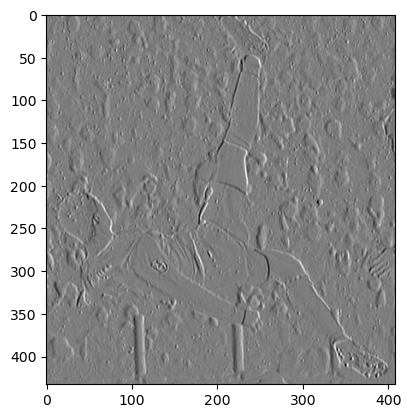

In [104]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
cr7_filtrado = convolucion(cr7, kernel)
plt.imshow(cr7_filtrado, cmap='gray')

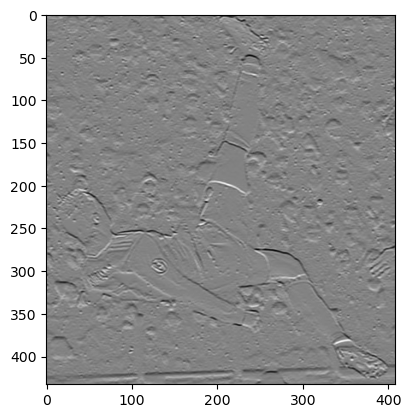

In [105]:
kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
cr7_filtrado = convolucion(cr7, kernel)
plt.imshow(cr7_filtrado, cmap='gray')

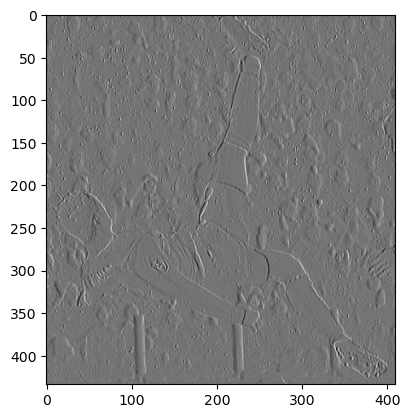

In [106]:
kernel = np.array([[1,-1],[1,-1]])
cr7_filtrado = convolucion(cr7, kernel)
plt.imshow(cr7_filtrado, cmap='gray')



### Kernel

Un kernel es una matriz de números que se utiliza para realizar la convolución. Los kernels se utilizan para extraer características específicas de la imagen de entrada. Por ejemplo, un kernel puede ser utilizado para detectar bordes, otro para detectar esquinas, etc.

### Argumentos principales de la convolución

- **stride**: Es el número de píxeles que se desplaza el kernel en cada paso de la convolución.
- **padding**: Es la cantidad de píxeles que se agregan alrededor de la imagen de entrada.
- **bias**: Es un valor constante que se suma a la salida de la convolución.

<img src=data/stride.svg>

<img src=data/padding.svg>

## TorchVision

In [107]:
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(cr7)
print(img_tensor.shape)

torch.Size([1, 435, 410])


In [108]:
import torch.nn as nn 
import torch

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0)
img_tensor = img_tensor.type(torch.FloatTensor)
output = conv_layer(img_tensor)
output.shape

torch.Size([3, 433, 408])

In [109]:
output = output.permute(1,2,0).detach().numpy()

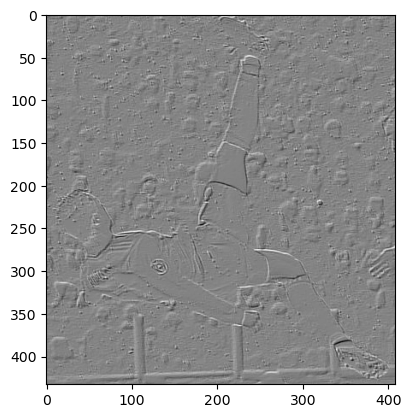

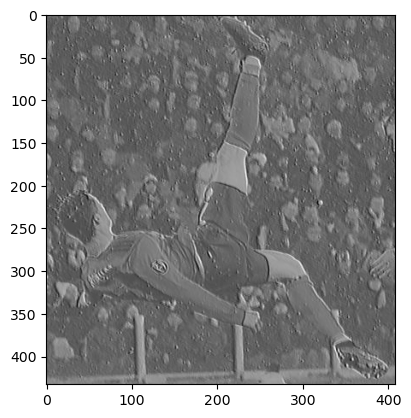

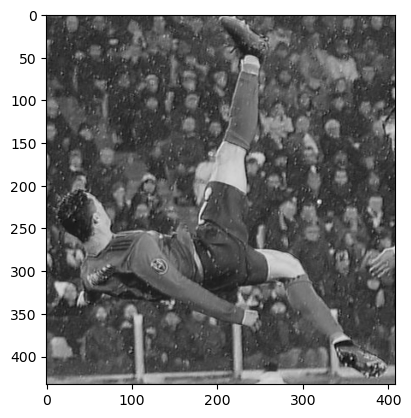

In [110]:
for channel in range(output.shape[2]):
    plt.imshow(output[:,:,channel], cmap='gray')
    plt.show()

In [111]:
output.shape

(433, 408, 3)

### Pooling

Capas que reducen la dimensionalidad de la imagen, manteniendo las características más importantes sin importar tanto la ubicación. Existen dos tipos de pooling: MaxPooling y AveragePooling.

In [115]:
pool_layer = nn.MaxPool2d(kernel_size=(2,2), stride=2)
img_random = torch.rand(1,10,10)
output = pool_layer(img_random)
output.shape

torch.Size([1, 5, 5])

### Qué es lo que hace una red convolucional?

In [136]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.activation(x)
        x = self.conv2(x)
        return x

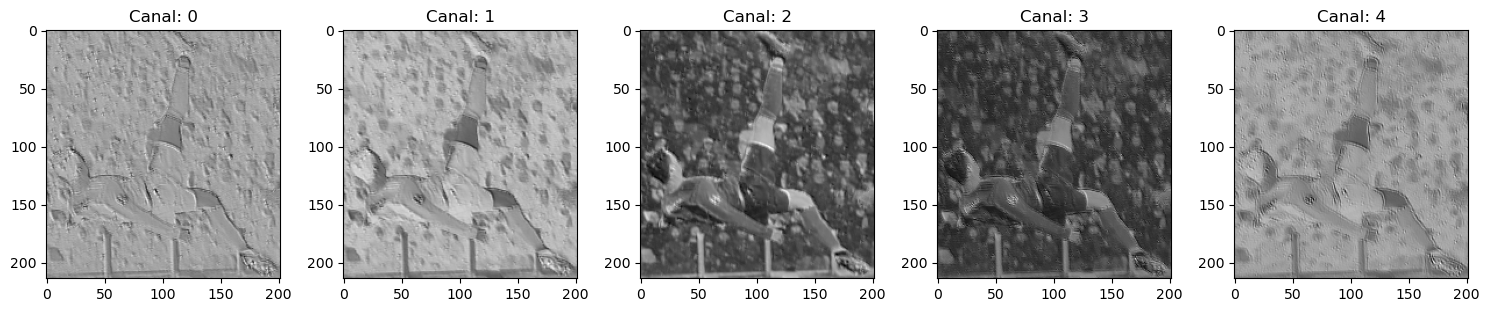

In [137]:
cr7_tensor = transform(cr7).unsqueeze(0)
cr7_tensor = cr7_tensor.type(torch.FloatTensor)
model = CNN()
output = model(cr7_tensor).squeeze(0)
fig,ax = plt.subplots(1,5,tight_layout=True,figsize=(15,5))
for i,ax_ in enumerate(ax):
    ax_.imshow(output[i].detach().numpy(), cmap='gray')
    ax_.set_title("Canal: " + str(i))

- Extraer características de la imagen de entrada.
- Reducir la dimensionalidad de la imagen. 

In [139]:
output.shape

torch.Size([5, 214, 202])

In [141]:
output.view(-1,5*214*202).shape

torch.Size([1, 216140])

In [142]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),
            nn.ReLU(),
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Linear(5*214*202, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1,5*214*202)
        x = self.classifier(x)
        return x